# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<br/>
<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

<br/>
<br/>

<center><i><b>
Atenção: não são autorizadas cópias, divulgações ou qualquer tipo de uso deste material sem o consentimento prévio dos autores.
</center></i></b>

# <center>Exercício - Máquinas de Vetores de Suporte</center>

Introdução
----------
Neste exercício, iremos usar o método máquinas de vetores de suporte (SVM) com vários exemplos em 2D. Os experimentos conduzidos neste exercício foram realizados com o intuito de ajudar a entender como o SVM funciona e como empregar uma função de kernel radial.



## Parte 1: Visualizando as amostras da base de dados 1

O primeiro exemplo é baseado em uma base de dados cujas classes podem ser separadas usando um classificador linear. 

Primeiro, vamos carregar os dados do arquivo.

In [1]:
# -*- coding: utf-8 -*-

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes

#importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'dados/data1.csv', sep=',', index_col=None, header=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


Agora, vamos dar uma olhada nas 5 primeiras amostras da base de dados.

In [2]:
#vamos usar a função display para imprimir o dataframe
display(df_dataset.head(n=6))

,0,1,2
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1
5,4.0150,3.1937,1


Vamos guardar os dados dentro de uma matriz e as classes dentro de um vetor.

In [3]:
#pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X = df_dataset.iloc[:, 0:-1].values 

#pega os valores da última coluna e guarda em um vetor Y
Y = df_dataset.iloc[:, -1].values 

#imprime as 5 primeiras linhas da matriz X
display('X:', X[0:5,:])

#imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])

'X:'

array([[ 1.9643,  4.5957],
       [ 2.2753,  3.8589],
       [ 2.9781,  4.5651],
       [ 2.932 ,  3.5519],
       [ 3.5772,  2.856 ]])

Y: [1 1 1 1 1]


Agora, vamos criar uma função para plotar os dados.

In [4]:
#importa a biblioteca matplotlib
import matplotlib.pyplot as plt

#função para plotar os dados
def visualizarDados(X,Y):
    """
    Função usada para plotar os dados
    """
    
    #define o tamanho da figura 
    plt.figure(figsize=(10,8))
    
    #plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 1', color='blue', s=50, edgecolors='k') 
    
    #plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 0', color='red', s=50, edgecolors='k') 
        
    #plota a legenda
    plt.legend()
    
#chama a função que plota os dados   
visualizarDados(X,Y)
plt.show()

## Parte 2: Treinando um SVM com kernel linear

Usando o código a seguir, iremos treinar um classificador SVM com kernel linear. Para isso, iremos empregar a biblioteca LIBSVM. Essa biblioteca é escrita em C++, mas pode também ser usada no Python.

Existem várias formas de instalar e usar a biblioteca LIBSVM:
 - ela pode ser baixada em https://www.csie.ntu.edu.tw/~cjlin/libsvm/
 - ela pode ser instalada no Anaconda por meio dos seguintes comandos:
     - `conda install -c conda-forge libsvm`
     - `conda install -c conda-forge/label/cf201901 libsvm`
 - ela pode ser instalada no Linux através do comando:
     - `sudo apt-get install python-libsvm`
     
No diretório deste exercício, já foram colocados três arquivos necessários para o funcionamento da LIBSVM no python: *svmutil.py*, *svm.py*, *commonutil.py*. Esses arquivos são os mesmos disponibilizados no site da biblioteca LIBSVM. 

Para informações sobre como usar as funções e parâmetros da LIBSVM no python, acesse: https://github.com/cjlin1/libsvm/tree/master/python.

Neste primeiro exemplo, vamos usar um valor de custo igual a 1.0. Para que o código abaixo funcione, é necessário que você instale a biblioteca LIBSVM usando umas das formas de instalação apresentadas acima.

In [5]:
import svmutil
from svmutil import svm_read_problem
from svmutil import svm_problem
from svmutil import svm_parameter
from svmutil import svm_train
from svmutil import svm_predict
from svmutil import svm_save_model

#treina o classificador
custo = 1.0
kernel = 0 #seta que o kernel será linear (ausência de kernel)
model = svm_train(Y, X, '-c %f -t %d' %(custo, kernel))

print(model)

Agora, vamos plotar o limite de decisão gerado pelo SVM.

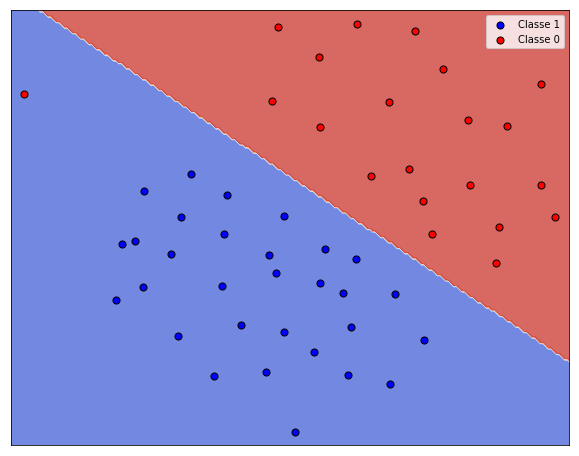

In [6]:
#função para plotar o limite de decisão
def plota_limite_decisao(model, X, Y):

    fig = plt.figure(figsize=(10,8))
    
    ax = plt.gca()
        
    x = X[:, 0]
    y = X[:, 1]
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    
    Z, p_acc, p_val = svm_predict([], np.c_[xx.ravel(), yy.ravel()], model, '-q')
    Z = np.array(Z)
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    ax.set_xlim(x.min()-0.1, x.max()+0.1)
    ax.set_ylim(y.min()-0.1, y.max()+0.1)
    ax.set_xticks(())
    ax.set_yticks(())

    #plota os dados da classe 0
    plt.scatter( X[Y==0,0], X[Y==0,1], label='Classe 1', color='blue', s=50, edgecolors='k') 
    
    #plota os dados da classe 1
    plt.scatter( X[Y==1,0], X[Y==1,1], label='Classe 0', color='red', s=50, edgecolors='k') 

    #insere a legenda
    plt.legend()

    
#plota os dados de treinamento
plota_limite_decisao(model, X, Y)
plt.show()


O gráfico acima apresenta o limite de decisão criado pelo SVM com custo igual a 1. Agora, vamos gerar outro modelo, mas usando custo igual a 100.

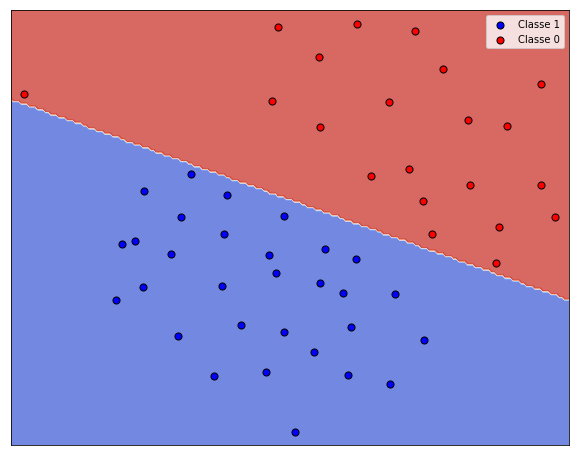

In [7]:
### treina o classificador ###
custo = 100.0
kernel = 0 # kernel linear
model = svm_train(Y, X, '-c %f -t %d' %(custo, kernel))

#plota o limite de decisão
plota_limite_decisao(model, X, Y)

Conforme pode ser observado nos exemplos acima, quando usamos valores altos para o parâmetro de custo, o SVM tenta classificar todos os exemplos de treinameto corretamente.

Antes de ir para a próxima etapa, você pode testar outros valores de custo para o SVM e verificar como isso afeta o limite de decisão. 

## Parte 3: Treinando o SVM com função de kernel radial

Antes de implementar o SVM com função de kernel radial, vamos importar e visualizar a segunda base de dados.

'X:'

array([[ 0.107143 ,  0.60307  ],
       [ 0.093318 ,  0.649854 ],
       [ 0.0979263,  0.705409 ],
       [ 0.15553  ,  0.784357 ],
       [ 0.210829 ,  0.866228 ]])

Y: [1 1 1 1 1]


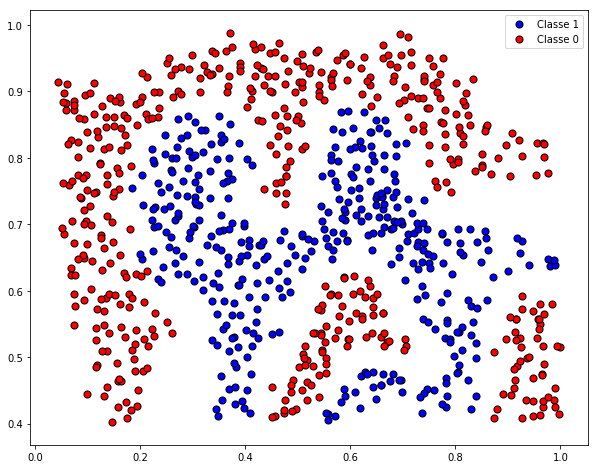

In [8]:
#importa o arquivo e guarda em um dataframe do Pandas
df_dataset2 = pd.read_csv( 'dados/data2.csv', sep=',', index_col=None, header=None)

#pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X2 = df_dataset2.iloc[:, 0:-1].values 

#pega os valores da última coluna e guarda em um vetor Y
Y2 = df_dataset2.iloc[:, -1].values 

#imprime as 5 primeiras linhas da matriz X
display('X:', X2[0:5,:])

#imprime os 5 primeiros valores de Y
print('Y:', Y2[0:5])

#plota os dados de treinamento
visualizarDados(X2,Y2)
plt.show()

Agora, vamos treinar o SVM com as amostras dessa segunda base de dados. Dessa vez, vamos usar o kernel radial.

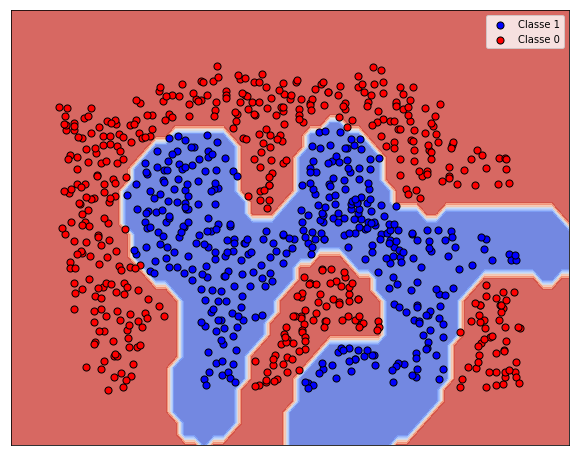

In [9]:
### treina o classificador com custo=1, gamma=2 e kernel radial ###
custo = 1.0
gamma = 100
kernel = 2 # escolhe o kernel radial
model = svm_train(Y2, X2, '-c %f -t %d -g %f' %(custo, kernel, gamma))

#plota o limite de decisão
plota_limite_decisao(model, X2, Y2)

Você pode testar outros valores para os parâmetros `custo` e `gamma`. Veja como a escolha desses parâmetros afeta a superfície de decisão criada pelo SVM.

## Parte 4: Experimentos com a base de dados 3

Nesta parte do exercício, faremos experimentos com a terceira base de dados. Essa base possui um conjunto de validação que usaremos para selecionar o custo e o parâmetro gamma do SVM com kernel radial. 

Primeiro, vamos carregar e visualizar os dados.

Dados carregados com sucesso!


'X:'

array([[-0.158986,  0.423977],
       [-0.347926,  0.47076 ],
       [-0.504608,  0.353801],
       [-0.596774,  0.114035],
       [-0.518433, -0.172515]])

'Xval:'

array([[-0.35306235, -0.67390181],
       [-0.2271258 ,  0.44731976],
       [ 0.09289767, -0.75352419],
       [ 0.14824252, -0.71847308],
       [-0.00151249,  0.16292786]])

Y: [1 1 1 1 1]
Yval: [0 1 0 0 0]


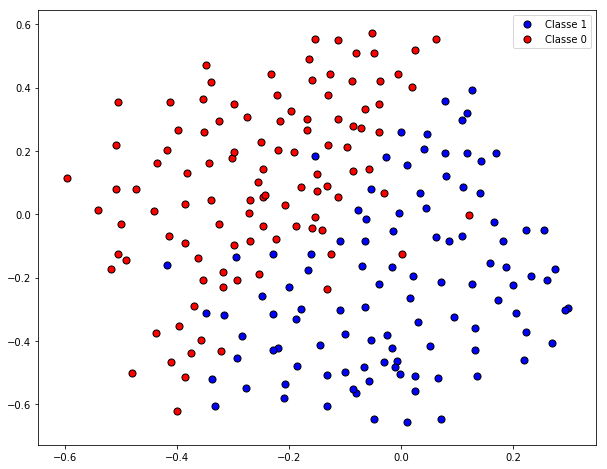

In [10]:
#importa o arquivo e guarda em um dataframe do Pandas
df_dataset3 = pd.read_csv( 'dados/data3.csv', sep=',', index_col=None, header=None)
df_dataset3_val = pd.read_csv( 'dados/data3_val.csv', sep=',', index_col=None, header=None)

print('Dados carregados com sucesso!')

#pega os valores das n-1 primeiras colunas e guarda em uma matrix X
X3 = df_dataset3.iloc[:, 0:-1].values 
X3val = df_dataset3_val.iloc[:, 0:-1].values 

#pega os valores da última coluna e guarda em um vetor Y
Y3 = df_dataset3.iloc[:, -1].values 
Y3val = df_dataset3_val.iloc[:, -1].values 

#imprime as 5 primeiras linhas da matriz X
display('X:', X3[0:5,:])
display('Xval:', X3val[0:5,:])

#imprime os 5 primeiros valores de Y
print('Y:', Y[0:5])
print('Yval:', Y3val[0:5])

#plota os dados de treinamento
visualizarDados(X3,Y3)
plt.show()

Agora, você deverá usar o conjunto de validação (*X3val*,*Y3val*) para encontrar os melhores valores para os parâmetros $C$ (parâmetro de regularização do SVM) e $\gamma$ (parâmetro do kernel RBF). Você deverá completar a função *gridSearch* para fazer a busca dos melhores valores para esses parâmetros. É recomendável que sejam usados valores em escala multiplicativa, como $0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30$. Você deve testar todos os pares de valores para $C$ e $\gamma$ dentro do intervalo escolhido (*e.g.*, $C = 0.3$ e $\gamma$ $ = 0.1$). Por exemplo, se você testar cada um dos oito valores recomendados para $C$ e $\gamma$, você treinará e avaliará um total de $8^2 = 64$ diferentes modelos. Depois de determinar a melhor combinação para $C$ e $\gamma$, você deverá usar tais valores para inicializar o modelo que será treinado com o conjunto $X3, Y3$.

Melhores parâmetros
C: 0.300, gamma=100.000


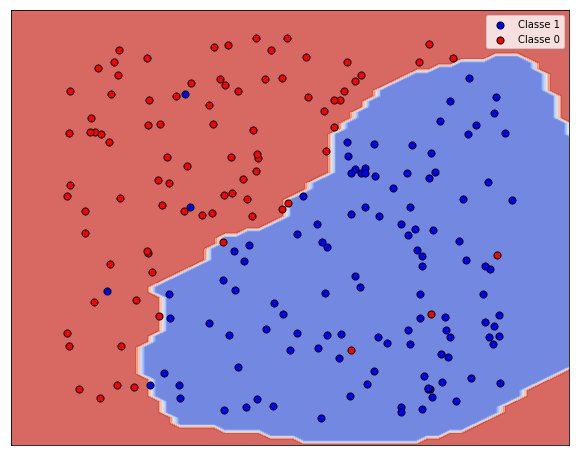

In [11]:
def gridSearch(X, Y, Xval, Yval):
    """
    Retorna o melhor valor para os parâmetros custo e gamma do SVM radial.
    
    Parâmetros
    ----------
    X : matriz com os dados de treinamento
    
    y : vetor com classes de cada dados de treinamento
    
    Xval : matriz com os dados de validação
    
    yval : vetor com as classes dos dados de validação
    
    Retorno
    -------
    custo, gamma : os melhores valores para os parêmetros custo e gamma.
    
     """
    
    #inicializa as variáveis que deverão ser retornadas pela função
    custo = 1000
    gamma = 1000
    
    ########################## COMPLETE O CÓDIGO AQUI  ########################
    # Complete esta função para retornar os melhores valores de C e gamma com base
    # nos dados do conjunto de validação.
    # Você pode usar a função predict() para fazer a predição das classes das amostras do
    # conjunto de validação. Exemplo: 
    #
    #    classes = model.predict(Xval)
    #
    #
    # Importante
    # ----
    # Você pode calcular a acurácia usando
    # 
    #    acuracia = np.sum(classes==Yval)/len(Yval) 
   

    #classes = model.svm_predict(Xval)
    
    kernel = 2
    custo_teste = [0.01,0.03,0.1,0.3,1,3,10,30,100,300]
    gamma_teste = [0.01,0.03,0.1,0.3,1,3,10,30,100,300]
    acuracia = 0
    
    for i in custo_teste :
        for j in gamma_teste :
            
            model = svm_train(Y, X, '-c %f -t %d -g %f' %(i, kernel,j))
            classes = svm_predict(Yval,Xval,model,'-q')
            #acuraciatemp = np.sum(classes[0]==Yval)/len(Yval)
            #print(acuraciatemp)
            #print(i)
            #print(j)
            if i == 1 and j == 100 :
                plota_limite_decisao(model, Xval, Yval)
            if classes[1][0] > acuracia:
                acuracia = classes[1][0]
                custo = i
                gamma = j
                

    #print(custo)
    #print(gamma)







    ##########################################################################

    return custo, gamma


#chama a função que faz a busca em grade
bestC, bestGamma = gridSearch(X3, Y3, X3val, Y3val)
    
print('Melhores parâmetros\nC: %1.3f, gamma=%1.3f' %(bestC,bestGamma))

Agora, vamos treinar o SVM usando os parâmetros encontrados na busca em grade e ver como ficará a superfície de decisão.

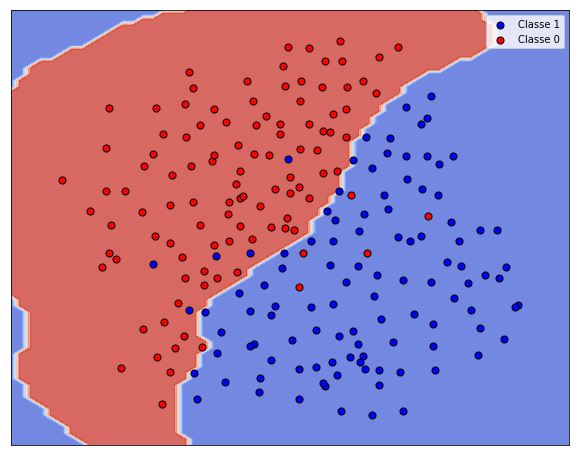

In [12]:
### treina o classificador com o melhor custo e o melhor gamma encontrados ###
kernel = 2 #kernel radial
model = svm_train(Y3, X3, '-c %f -t %d -g %f -q' %(bestC, kernel, bestGamma))

#plota a superfície de decisão
plota_limite_decisao(model, X3, Y3)